In [1]:
# Carregando bibliotecas
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

In [9]:
# Carregando o conjunto housing data
df = pd.read_csv('https://raw.githubusercontent.com/rasbt/'
                           'python-machine-learning-book-2nd-edition'
                           '/master/code/ch10/housing.data.txt',
                           sep='\s+')

df.columns = ['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD','TAX', 'PTRATIO', 'B', 'LSTAT', 'MEDV']

# Obtendo o conjunto de dados X e o vetor de alvos y
X = df[['RM']].values
y = df['MEDV'].values

# Dividindo o conjunto em treinamento e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

# Normalizando os dados
zscore = StandardScaler()
Xz_train = zscore.fit_transform(X_train)
Xz_test  = zscore.transform(X_test)

# Adicionando a coluna do bias (nunca esqueça, nos nossos algoritmos 
#                               baseados em perceptron/gradiente é necessário incluir!)
Xz_train = np.c_[np.ones(Xz_train.shape[0]), Xz_train]
Xz_test  = np.c_[np.ones(Xz_test.shape[0]) , Xz_test]

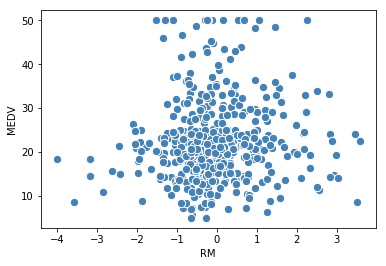

In [3]:
# Visualizando os dados (estamos pulando a coluna do bias)
plt.scatter(np.r_[Xz_train, Xz_test][:, 1], y, c='steelblue', edgecolor='white', s=70)
# RM -> Número medio de quartos por casa
plt.xlabel('RM')
# MEDV -> Preço médio da casa em $1000s
plt.ylabel('MEDV')
plt.show()

In [4]:
#  
# Código para plotar a linha de regressão para uma variável e uma saída
#
#    Entradas : X_{m, n}      = uma matriz (ou vetor) de características
#               y_{m, 1}      = um vetor de valores reais 
#               thetas_{n, 1} = um vetor de pesos
#
#    Observação: X deve estar com a coluna bias adicionada 
#
def lin_regplot(X, y, thetas):
    plt.scatter(X[:, 1], y, c='steelblue', edgecolor='white', s=70)
    plt.plot(X[:, 1], h(X, thetas), color='red', lw=2)
    return None

In [5]:
#
#  Hipótese vetorizada da Regressão linear
#
#    Entradas : X_{m, n}      = uma matriz (ou vetor) de características
#               thetas_{n, 1} = um vetor de pesos
#
#
#    Saída : função identidade.
#
#    Observação: X deve estar com a coluna bias adicionada
#

def h(X, thetas):
    return X.dot(thetas)

#
#  Função de custo da Regressão Linear
#
#    Entradas : X_{m, n}      = uma matriz (ou vetor) de características
#               thetas_{n, 1} = um vetor de pesos
#               y_{m, 1}      = um vetor de valores reais 
#
#    Observação: X deve estar com a coluna bias adicionada 
#

def J(X, thetas, y):
    return ((y - h(X, thetas))**2).sum()/2.0

#
#  Algoritmo de aprendizagem supervisionada de Regressão Linear (problema de regressão)
#
#    Entradas : X_{m, n}      = uma matriz (ou vetor) de características
#               y_{m, 1}      = um vetor de valores reais 
#               iterations    = número máximo de iterações do algoritmo
#               alpha         = taxa de aprendizagem, tipicamente um valor entre (0.0 e 1)
#
#
#    Saída : thetas = vetor de pesos aprendido pelo Adaline
#            custos = vetor de custos acumulados durante as iterações
#
#    Observação: X deve estar com a coluna bias adicionada
#

def regLinearGDB(X, y, iterations, alpha):
    thetas = np.zeros(X.shape[1])
    custos = []
    for i in range(iterations):        
        thetas = thetas + alpha * X.T.dot((y - h(X, thetas)))
        custos.append(J(X, thetas, y))
        
    return thetas, custos

In [6]:
# Treinando nosso modelo...
iterations = 100 
alpha = 0.001
(thetas, custos) = regLinearGDB(Xz_train, y_train, iterations, alpha)

y_train_pred = h(Xz_train, thetas)
y_test_pred = h(Xz_test, thetas)

# Erro médio quadrático
print('MSE train: %.3f, test: %.3f' % (mean_squared_error(y_train, y_train_pred), mean_squared_error(y_test, y_test_pred)))

MSE train: 43.402, test: 44.680


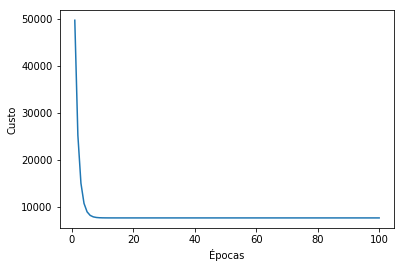

In [7]:
# Plotando a curva de custo
plt.plot(range(1, len(custos)+1), custos)
plt.xlabel('Épocas')
plt.ylabel('Custo')
plt.show()

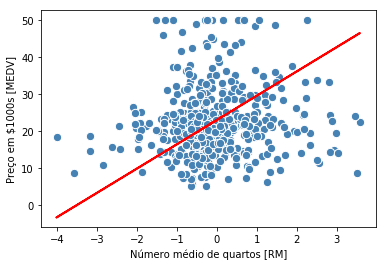

In [8]:
# Plotando a linha de regressão
lin_regplot(np.r_[Xz_train, Xz_test], y, thetas)
plt.xlabel('Número médio de quartos [RM]')
plt.ylabel('Preço em $1000s [MEDV]')
plt.show()